# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [58]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [59]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [60]:
websites

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0


In [61]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [62]:
websites.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [63]:
websites.WHOIS_COUNTRY.value_counts()

US                1103
None               306
CA                  84
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
IN                  10
CN                  10
UK                  10
FR                   9
CZ                   9
NL                   6
CH                   6
[u'GB'; u'UK']       5
KR                   5
PH                   4
AT                   4
ru                   4
BS                   4
SC                   3
BE                   3
DE                   3
us                   3
HK                   3
KY                   3
TR                   3
SE                   3
UA                   2
SI                   2
BR                   2
UY                   2
Cyprus               2
NO                   2
RU                   2
IL                   2
KG                   2
IE                   1
IT                   1
LV                   1
AE                   1
UG                   1
LU         

In [64]:
websites.CHARSET.unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

In [65]:
websites.SERVER.unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

In [66]:
websites.SERVER.value_counts()

Apache                                                                                                         386
nginx                                                                                                          211
None                                                                                                           175
Microsoft-HTTPAPI/2.0                                                                                          113
cloudflare-nginx                                                                                                94
                                                                                                              ... 
Sun-ONE-Web-Server/6.1                                                                                           1
Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips PHP/5.4.16 mod_apreq2-20090110/2.8.0 mod_perl/2.0.10 Perl/v5.24.1      1
SSWS                                                                            

In [67]:
websites.WHOIS_STATEPRO.unique()

array(['None', 'AK', 'TX', 'Mahe', 'CO', 'FL', 'Kansas',
       'Novosibirskaya obl.', 'CA', 'Tennessee', 'Vi', 'OR', 'Texas',
       'ALBERTA', 'PANAMA', 'Arizona', 'WI', 'Oregon', 'Andhra Pradesh',
       'AB', 'Tamil Nadu', 'VA', 'NY', 'quebec', 'MA', 'ON', 'New Mexico',
       'British Columbia', 'Massachusetts', 'California', 'bangkok',
       'WEST MIDLANDS', 'TEXAS', 'WC1N', 'Kentucky', 'MD', 'NEW YORK',
       'Washington', 'Colorado', 'PA', 'LA', 'WA', 'Queensland', 'MOSCOW',
       'UK', 'P', 'NH', 'Pennsylvania', 'UTTAR PRADESH', 'NC', 'kireka',
       'IL', 'Missouri', 'Osaka', 'QC', 'Michigan', 'Maryland', 'Ontario',
       'South Carolina', 'Zhejiang', 'New York', 'QLD', 'NJ', 'GA', 'MO',
       'HR', 'ab', 'Greater London', 'Illinois', '--', 'Fukuoka', 'BC',
       'AL', 'Krasnoyarsk', 'MAINE', 'Virginia', 'MH', 'GRAND CAYMAN',
       'Austria', 'DE', 'shandong', 'AZ', 'PRAHA', 'beijingshi',
       'liaoningsheng', 'North Carolina', 'OH', 'Manila', 'Utah', 'MI',
       '

In [68]:
websites.WHOIS_STATEPRO.value_counts()

CA                372
None              362
NY                 75
WA                 65
Barcelona          62
                 ... 
Greater London      1
Manitoba            1
Other               1
Punjab              1
Rogaland            1
Name: WHOIS_STATEPRO, Length: 182, dtype: int64

In [69]:
websites.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [70]:
# Your comment here
"""
- 21 columns
- WHOIS_REGDATE & WHOIS_UPDATED_DATE to be changed as date type
- CONTENT_LENGTH has half of NaNs
- URL are unique => no encoding, may be drop
- CHARSET can be encoded
- 239 different SERVERs with 175 None
- Duplicated value in WHOIS_COUNTRY: UK, GB, to be cleaned + None values
- WHOIS_STATEPRO repeat info in country sometimes + None values

May be websites with None server and countries are suspicious websites.

No indications for type
"""

'\n- 21 columns\n- WHOIS_REGDATE & WHOIS_UPDATED_DATE to be changed as date type\n- CONTENT_LENGTH has half of NaNs\n- URL are unique => no encoding, may be drop\n- CHARSET can be encoded\n- 239 different SERVERs with 175 None\n- Duplicated value in WHOIS_COUNTRY: UK, GB, to be cleaned + None values\n- WHOIS_STATEPRO repeat info in country sometimes + None values\n\nMay be websites with None server and countries are suspicious websites.\n\nNo indications for type\n'

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

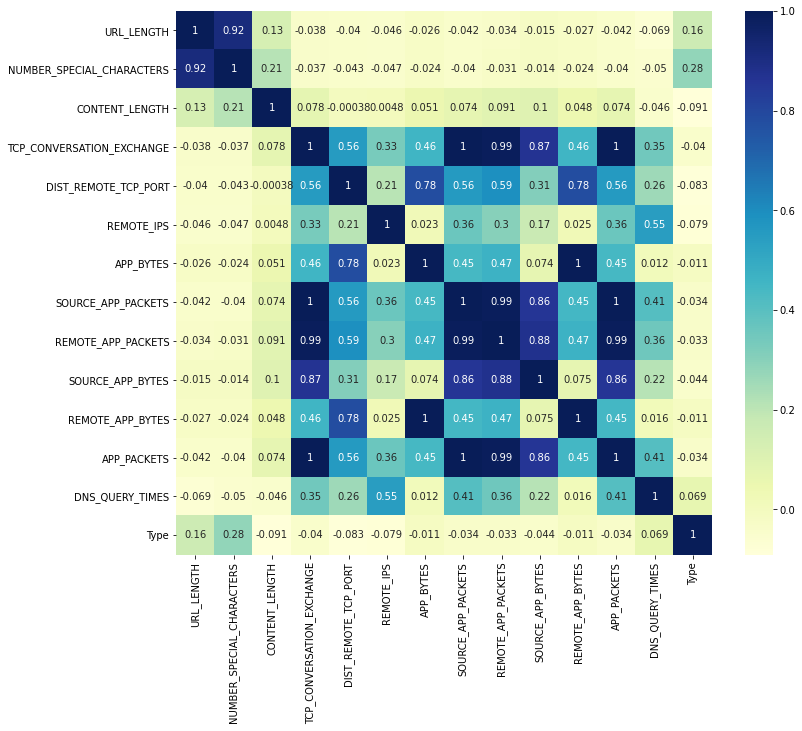

In [71]:
matrix = websites.select_dtypes(include=['float64','int64'])
f, ax = plt.subplots(figsize=(12, 10))
ax =sns.heatmap(matrix.corr(), annot=True,cmap = "YlGnBu")
plt.show()

In [72]:
# Your comment here
"""
high correlation between:
- TCP_CONVERSATION_EXCHANGE, APP_PACKETS, REMOTE_APP_PACKETS, SOURCE_APP_PACKETS
- APP_BYTES & REMOTE_APP_BYTES
- NUMBER_SPECIAL_CHARACTERS & URL_LENGTH

"""

'\nhigh correlation between:\n- TCP_CONVERSATION_EXCHANGE, APP_PACKETS, REMOTE_APP_PACKETS, SOURCE_APP_PACKETS\n- APP_BYTES & REMOTE_APP_BYTES\n- NUMBER_SPECIAL_CHARACTERS & URL_LENGTH\n\n'

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [73]:
# Your code here
websites.drop(["APP_PACKETS","REMOTE_APP_PACKETS","SOURCE_APP_PACKETS","REMOTE_APP_BYTES",
             "NUMBER_SPECIAL_CHARACTERS"],axis=1,inplace=True)

In [74]:
# Your comment here
"""All columns with more than 0.9 colinearity coeff were dropped"""

'All columns with more than 0.9 colinearity coeff were dropped'

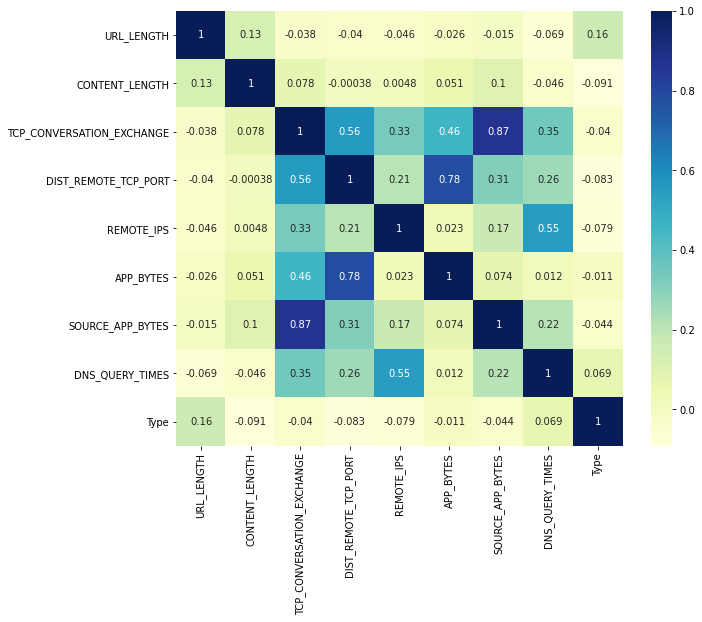

In [75]:
# Print heatmap again
f, ax = plt.subplots(figsize=(10, 8))
ax =sns.heatmap(websites.select_dtypes(["float64","int64"]).corr(), annot=True,cmap = "YlGnBu")
plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [76]:
websites.isna().sum()

URL                            0
URL_LENGTH                     0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [77]:
# drop CONTENT_LENGTH column
websites.drop(["CONTENT_LENGTH"],axis=1,inplace=True)

# display rows with NaNs remaining:
websites[websites.isna().any(axis=1)]

# drop the two rows with NaNs
websites.dropna(axis=0,inplace=True)

In [78]:
# Your comment here
"""
- CONTENT_LENGTH has arround 50% of the values missing so the column was dropped
- 2 rows remaining with NaNs were dropped as well: one had SERVER missing and
the other one had DNS_QUERY_TIMES missing
"""

'\n- CONTENT_LENGTH has arround 50% of the values missing so the column was dropped\n- 2 rows remaining with NaNs were dropped as well: one had SERVER missing and\nthe other one had DNS_QUERY_TIMES missing\n'

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [79]:
websites.isna().sum()

URL                          0
URL_LENGTH                   0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [80]:
websites.WHOIS_COUNTRY.value_counts()

US                1102
None               306
CA                  83
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
IN                  10
CN                  10
UK                  10
FR                   9
CZ                   9
NL                   6
CH                   6
[u'GB'; u'UK']       5
KR                   5
PH                   4
AT                   4
ru                   4
BS                   4
SC                   3
BE                   3
DE                   3
us                   3
HK                   3
KY                   3
TR                   3
SE                   3
UA                   2
SI                   2
BR                   2
UY                   2
Cyprus               2
NO                   2
RU                   2
IL                   2
KG                   2
IE                   1
IT                   1
LV                   1
AE                   1
UG                   1
LU         

In [81]:
websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.str.replace("us", "US")
websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.str.replace("CyprUS", "CY")
websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.str.replace("se", "SE")
websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.str.replace("United Kingdom", "UK")
websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.str.replace("GB", "UK")
websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.str.replace("ru", "RU")

In [82]:
websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.str.replace(r"\[u'UK'; u'UK']", "UK")

In [83]:
websites.WHOIS_COUNTRY.value_counts()

US      1105
None     306
CA        83
ES        63
AU        35
UK        35
PA        21
JP        11
IN        10
CN        10
FR         9
CZ         9
RU         6
CH         6
NL         6
KR         5
BS         4
PH         4
AT         4
SE         4
BE         3
HK         3
DE         3
SC         3
KY         3
TR         3
IL         2
SI         2
BR         2
NO         2
KG         2
UA         2
UY         2
CY         2
LU         1
AE         1
UG         1
BY         1
LV         1
PK         1
TH         1
IE         1
IT         1
Name: WHOIS_COUNTRY, dtype: int64

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

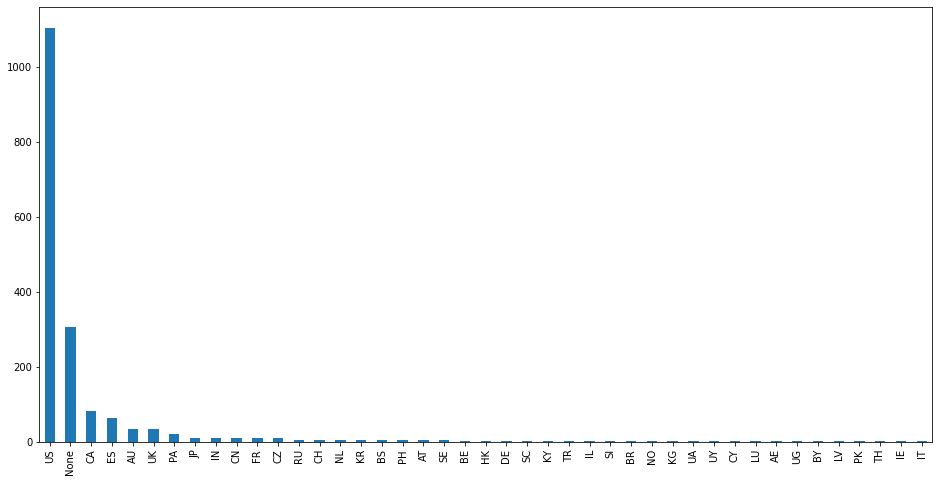

In [84]:
plt.figure(figsize=(16,8))

websites.WHOIS_COUNTRY.value_counts().plot.bar()

plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [85]:
def country(x):
    if x not in websites.WHOIS_COUNTRY.value_counts().nlargest(10):
        x = "OTHER"
        return x
    else:
        return x

In [86]:
websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(country)

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [87]:
websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'],axis=1,inplace=True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [88]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1779 non-null   object 
 1   URL_LENGTH                 1779 non-null   int64  
 2   CHARSET                    1779 non-null   object 
 3   SERVER                     1779 non-null   object 
 4   WHOIS_COUNTRY              1779 non-null   object 
 5   TCP_CONVERSATION_EXCHANGE  1779 non-null   int64  
 6   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 7   REMOTE_IPS                 1779 non-null   int64  
 8   APP_BYTES                  1779 non-null   int64  
 9   SOURCE_APP_BYTES           1779 non-null   int64  
 10  DNS_QUERY_TIMES            1779 non-null   float64
 11  Type                       1779 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 180.7+ KB


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [89]:
websites.drop(["URL"],axis=1,inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [90]:
websites.CHARSET.value_counts()

UTF-8           674
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
ISO-8859          1
windows-1251      1
windows-1252      1
Name: CHARSET, dtype: int64

In [91]:
websites.CHARSET = websites.CHARSET.str.replace('iso',"ISO")
websites.CHARSET = websites.CHARSET.str.replace('utf','UTF')
websites.CHARSET = websites.CHARSET.str.replace('ISO-8859-1','ISO-8859')
websites.CHARSET = websites.CHARSET.str.replace('windows-1251','windows-1251/2')
websites.CHARSET = websites.CHARSET.str.replace('windows-1252','windows-1251/2')

In [92]:
websites.CHARSET.value_counts()

UTF-8             1053
ISO-8859           562
us-ascii           155
None                 7
windows-1251/2       2
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [93]:
websites.SERVER.value_counts()

Apache                                                                                                         385
nginx                                                                                                          211
None                                                                                                           175
Microsoft-HTTPAPI/2.0                                                                                          113
cloudflare-nginx                                                                                                94
                                                                                                              ... 
Sun-ONE-Web-Server/6.1                                                                                           1
Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips PHP/5.4.16 mod_apreq2-20090110/2.8.0 mod_perl/2.0.10 Perl/v5.24.1      1
SSWS                                                                            

![Think Hard](../images/think-hard.jpg)

In [94]:
# Your comment here
"""Replace by server admin. for example Apache, Microsoft, etc"""

'Replace by server admin. for example Apache, Microsoft, etc'

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [95]:
def server(x):
    if 'Apache' in x:
        x='Apache'
        return x
    elif 'Microsoft' in x:
        x='Microsoft'
        return x
    elif 'nginx' in x:
        x='nginx'
        return x
    else:
        x='Other'
        return x

In [96]:
websites.SERVER = websites.SERVER.apply(server)

In [97]:
# Count `SERVER` value counts here
websites.SERVER.value_counts()

Apache       642
Other        504
nginx        435
Microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [110]:
website_dummy = pd.get_dummies(websites)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [111]:
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1779 non-null   int64  
 1   TCP_CONVERSATION_EXCHANGE  1779 non-null   int64  
 2   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 3   REMOTE_IPS                 1779 non-null   int64  
 4   APP_BYTES                  1779 non-null   int64  
 5   SOURCE_APP_BYTES           1779 non-null   int64  
 6   DNS_QUERY_TIMES            1779 non-null   float64
 7   Type                       1779 non-null   int64  
 8   CHARSET_ISO-8859           1779 non-null   uint8  
 9   CHARSET_None               1779 non-null   uint8  
 10  CHARSET_UTF-8              1779 non-null   uint8  
 11  CHARSET_us-ascii           1779 non-null   uint8  
 12  CHARSET_windows-1251/2     1779 non-null   uint8  
 13  SERVER_Apache              1779 non-null   uint8

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [116]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(website_dummy,train_size=0.8)

X_train = train_set.drop(["Type"],axis=1)
y_train = train_set["Type"]

X_test = test_set.drop(["Type"],axis=1)
y_test = test_set["Type"]

In [125]:
y_train

1186    0
883     0
1752    1
529     0
1144    0
       ..
1127    0
1281    0
783     0
930     0
841     0
Name: Type, Length: 1423, dtype: int64

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [142]:
from sklearn.linear_model import LogisticRegression

malware = LogisticRegression(random_state=0)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [143]:
malware.fit(X_train,y_train)

/usr/local/Cellar/jupyterlab/2.1.4/libexec/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

0.8764044943820225


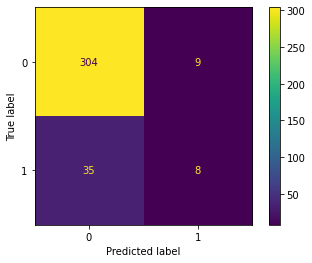

In [145]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

print(accuracy_score(y_test,malware.predict(X_test)))

plot_confusion_matrix(malware,X_test,y_test)
plt.show()

What are your thoughts on the performance of the model? Write your conclusions below.

In [104]:
# Your conclusions here:
"""Too much type 1 detected as type 0"""

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [146]:
from sklearn.neighbors import KNeighborsClassifier

model_k3 = KNeighborsClassifier(n_neighbors=3)
model_k3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [147]:
from sklearn.metrics import accuracy_score

predictions = model_k3.predict(X_test)

accuracy_score(y_test,predictions)

0.9269662921348315

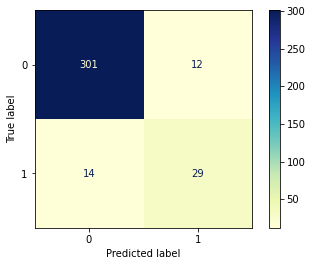

In [148]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_k3,X_test,y_test, cmap='YlGnBu')
plt.show()

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

0.9325842696629213


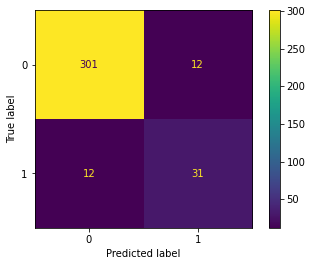

In [141]:
model_k5 = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
print(accuracy_score(y_test,model_k5.predict(X_test)))
plot_confusion_matrix(model_k5,X_test,y_test)
plt.show()

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [108]:
# Your conclusions here:
"""
Improvement in the accuracy score and in the false detected malware
"""

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [167]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [168]:
accuracy_score(y_test,pred)

0.9297752808988764